In [1]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

/home/manuel/projects/neural_networks_experiments/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Training a BPE tokenizer in spanish

In [2]:
import re
class BPE_regex:
    def __init__(self):
        self.merges_map = dict()
        self.vocabulary = {idx: bytes([idx]) for idx in range(256)}
        self.pat = r"'s|'t|'re|'ve|'m|'ll|'d| ?\w+| \d+| ?[^\s\w\d]+|\s+(?!\S)|\s+" # contractions, words, numbers, punctuation, continued spaces except 
        # the last space so it doesn't destroy the structure where a word or number starts with a space, and finally continued spaces at the end of the string 

    def decode(self, encoded):
        # Join the bytes as a string of bytes and then decode
        return b''.join([self.vocabulary[idx] for idx in encoded]).decode('utf-8', errors='replace')
    
    def encode(self, text):
        tokens = []
        for token in re.findall(self.pat, text, re.IGNORECASE):
            tokens.extend(tokenizer._encode(token))
        return tokens
    
    def _encode(self, text):
        # Transform string to a list of bytes
        encoded = list(text.encode('utf-8'))

        while len(encoded) > 1:
            # Find the pair that should be merged first: It is the pair that has the lowest id in the vocabulary
            pairs = set()
            for pair in zip(encoded[:-1], encoded[1:]):
                pairs.add(pair)
            pair_to_merge = min(pairs, key=lambda pair: self.merges_map.get(pair, float('inf'))) # The pair with the lowest index

            # If there is no pair to merge break out of the loop
            if pair_to_merge not in self.merges_map:
                break

            # Replace each merged token one by one in the merged order
            new_tokens = []
            i = 0
            while i < len(encoded):
                pair = encoded[i], encoded[i+1] if i < len(encoded) -1 else None # if is the last position pair is None
                # If there is pair to merge add the proper id and advance i to skip the tail of the pair
                if pair is not None and pair == pair_to_merge:
                    new_tokens.append(self.merges_map[pair_to_merge])
                    i += 1
                # If there is no pair to merge, add the id i in the ith position
                else:
                    new_tokens.append(encoded[i])
                # Go to the next id
                i += 1
            encoded = new_tokens

        return encoded

    def train(self, corpus, vocab_size: int):
        self.vocab_size = vocab_size
        pre_tokens = re.findall(self.pat, corpus, re.IGNORECASE)
        new_encoded = [list(tok.encode('utf-8')) for tok in pre_tokens]

        vocab_size = 256 # initial vocab_size is the number of bytes
        while vocab_size < self.vocab_size:
            # Count pairs
            counts = {}
            for fragment in new_encoded:
                for pair in zip(fragment[:-1], fragment[1:]):
                    counts[pair] = counts.get(pair, 0) + 1
            # Get the pair to create the new token
            max_pair = max(counts, key=counts.get)

            # Save the new token
            new_tok_id = vocab_size
            self.vocabulary[new_tok_id] = self.vocabulary[max_pair[0]] + self.vocabulary[max_pair[1]] # Concatenate the bytes
            self.merges_map[max_pair] = new_tok_id
            vocab_size += 1

            # Check if there is any merging to do
            new_tokens = []
            for fragment in new_encoded:
                fragment_tokens = []
                i = 0
                while i < len(fragment):
                    pair = fragment[i], fragment[i+1] if i < len(fragment) -1 else None # if is the last position pair is None
                    if pair is not None and pair == max_pair:
                        fragment_tokens.append(new_tok_id)
                        i += 1
                    else:
                        fragment_tokens.append(fragment[i])
                    i += 1
                new_tokens.append(fragment_tokens)
            new_encoded = new_tokens

    def save(self, file_name: str):
        os.makedirs('tokenizer', exist_ok=True)
        file_path = os.path.join('tokenizer', file_name + '.pkl')
        with open(file_path, 'wb') as file:
            pickle.dump(self, file)

    @staticmethod
    def load(file_name: str):
        file_path = os.path.join('tokenizer', file_name + '.pkl')
        with open(file_path, 'rb') as file:
            return pickle.load(file)

In [3]:
# Train the tokenizer
# with open('isla_del_tesoro.txt') as file:
#     corpus = file.read()
# tokenizer = BPE_regex()
# tokenizer.train(corpus, 2000)

In [4]:
# Save the tokenizer
# tokenizer.save('bpe_spanish_2000')

In [5]:
# load a previously trained tokenizer
tokenizer = BPE_regex.load('bpe_spanish_2000')

In [6]:
# Show the tokens in the vocabulary
for id, token in tokenizer.vocabulary.items():
    print(f"""token {id}: \"{token.decode('utf-8', errors='replace')}\"""")

token 0: " "
token 1: ""
token 2: ""
token 3: ""
token 4: ""
token 5: ""
token 6: ""
token 7: ""
token 8: "
token 9: "	"
token 10: "
"
token 11: ""
token 12: ""
"oken 13: "
token 14: ""
token 15: ""
token 16: ""
token 17: ""
token 18: ""
token 19: ""
token 20: ""
token 21: ""
token 22: ""
token 23: ""
token 24: ""
token 25: ""
token 26: ""
token 27: ""
token 28: ""
token 29: ""
token 30: ""
token 31: ""
token 32: " "
token 33: "!"
token 34: """
token 35: "#"
token 36: "$"
token 37: "%"
token 38: "&"
token 39: "'"
token 40: "("
token 41: ")"
token 42: "*"
token 43: "+"
token 44: ","
token 45: "-"
token 46: "."
token 47: "/"
token 48: "0"
token 49: "1"
token 50: "2"
token 51: "3"
token 52: "4"
token 53: "5"
token 54: "6"
token 55: "7"
token 56: "8"
token 57: "9"
token 58: ":"
token 59: ";"
token 60: "<"
token 61: "="
token 62: ">"
token 63: "?"
token 64: "@"
token 65: "A"
token 66: "B"
token 67: "C"
token 68: "D"
token 69: "E"
token 70: "F"
token 71: "G"
token 

## Prepare the dataset

A dataset of wikipedia articles in spanish

In [7]:
# Load a 1.7M wikipedia articles in spanish
dataset = load_from_disk('wikipedia')

In [8]:
# Calculate the characters length of each article
dataset = dataset.map(lambda x: {'text_length': len(x['text'])}, num_proc=5)

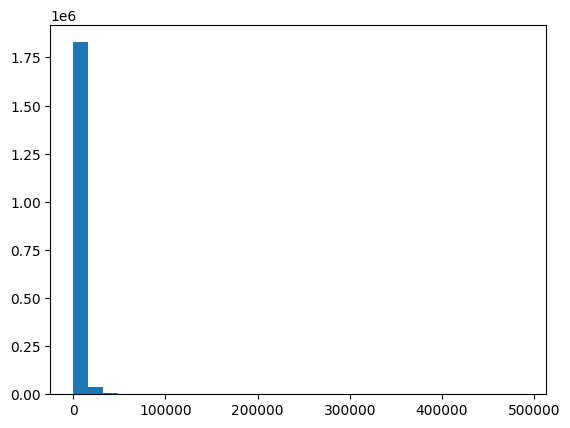

In [9]:
# Make a histogram of the text lengths
plt.hist(dataset['text_length'], bins=30)
plt.show()

In [10]:
# Make table of percentiles
percentiles = np.percentile(dataset['text_length'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
percentiles

array([8.00000e+00, 3.09000e+02, 4.85000e+02, 7.44000e+02, 1.03100e+03,
       1.39300e+03, 1.92200e+03, 2.69400e+03, 3.98100e+03, 6.92300e+03,
       4.88777e+05])

In [11]:
# Remove very short articles
dataset = dataset.filter(lambda x: len(x['text']) > 309)
dataset

Dataset({
    features: ['id', 'url', 'title', 'text', 'text_length'],
    num_rows: 1691121
})

In [12]:
# Encode each of the articles
# dataset = dataset.map(lambda x: {'encoded' :tokenizer.encode(x['text'])},batch_size=4000, num_proc=30)

In [13]:
# Save the encoded dataset
# dataset.save_to_disk('wikipedia_encoded', num_proc=20)

In [14]:
# load the encoded dataset
dataset = load_from_disk('wikipedia_encoded')

In [15]:
# Remove short articles (less than 300 tokens)
dataset = dataset.filter(lambda x: len(x['encoded']) > 300, num_proc=20)

In [16]:
# Total number of tokens in the dataset
# total_tokens = 0
# for batch in dataset.iter(batch_size=100000):
#     total_tokens += len(np.hstack(batch['encoded']))
# total_tokens

In [17]:
# Reserve some articles for validation
dataset = dataset.train_test_split(test_size=0.2, seed=42)
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'text', 'text_length', 'encoded'],
        num_rows: 1106343
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'text', 'text_length', 'encoded'],
        num_rows: 276586
    })
})

## Training the GPT model

In [18]:
# Hyper-parameters
import torch
import torch.nn as nn
import torch.nn.functional as F

block_size = 256
emb_dim = 512
total_batch_size = 16384 # In tokens
batch_size = 64
head_dim = 512
blocks_num = 6
heads_num = 8
droput = 0.4

# Training
steps = 10000
learning_rate = 3e-4

device = 'cuda' if torch.cuda.is_available() else 'cpu'

assert total_batch_size % (batch_size*block_size) == 0, 'total_batch_size is not compatible with the actual batch_size and block_size'

In [19]:
# Create a batch from the dataset
def get_batch(split='train'):
    data = dataset[split]
    # Choose at random a batch of articles
    # docs = np.random.randint(len(data), size=batch_size)
    docs = torch.randint(len(data), size=(batch_size,))
    # Choose at random a sequence from the articles
    ix = [torch.randint(0, len(data[d.item()]['encoded']) - block_size, (1,)) for d in docs]
    # For every letter, the target is the letter to the right
    x = torch.stack([torch.tensor(data[int(d)]['encoded'][i:i+block_size]) for d, i in zip(docs, ix)])
    y = torch.stack([torch.tensor(data[int(d)]['encoded'][i+1:i+block_size+1]) for d, i in zip(docs, ix)])
    return x.to(device), y.to(device)

x, y = get_batch('train')
x.shape, y.shape 

(torch.Size([64, 256]), torch.Size([64, 256]))

In [20]:
# Show some examples of the training data
for i in range(8):
    print(f'\n\nEXAMPLE {i+1}:')
    for j in range(x.shape[1]):
        print(f'{tokenizer.decode(x[i,:j+1].cpu().numpy())} -> {tokenizer.decode([y[i,j].item()])}')



EXAMPLE 1:
i -> ver
iver -> si
iversi -> ta
iversita -> rio
iversitario ->  ha
iversitario ha ->  a
iversitario ha a -> cog
iversitario ha acog -> ido
iversitario ha acogido ->  el
iversitario ha acogido el ->  par
iversitario ha acogido el par -> tido
iversitario ha acogido el partido ->  de
iversitario ha acogido el partido de ->  la
iversitario ha acogido el partido de la ->  ri
iversitario ha acogido el partido de la ri -> v
iversitario ha acogido el partido de la riv -> al
iversitario ha acogido el partido de la rival -> idad
iversitario ha acogido el partido de la rivalidad ->  entre
iversitario ha acogido el partido de la rivalidad entre ->  los
iversitario ha acogido el partido de la rivalidad entre los ->  R
iversitario ha acogido el partido de la rivalidad entre los R -> a
iversitario ha acogido el partido de la rivalidad entre los Ra -> m
iversitario ha acogido el partido de la rivalidad entre los Ram -> s
iversitario ha acogido el partido de la rivalidad entre los Rams ->

In [21]:
# GPT model
from torch import nn
    
class EfficientMultiHeadAttention(nn.Module):
    def __init__(self, input_dim, num_heads, block_size):
        super().__init__()
        assert head_dim % num_heads == 0
        self.Wk = nn.Parameter(torch.randn(num_heads, input_dim, head_dim//num_heads)*input_dim**-0.5) # [H, C_emb, C_h]
        self.Wq = nn.Parameter(torch.randn(num_heads, input_dim, head_dim//num_heads)*input_dim**-0.5) # [H, C_emb, C_h]
        self.Wv = nn.Parameter(torch.randn(num_heads, input_dim, head_dim//num_heads)*input_dim**-0.5) # [H, C_emb, C_h]
        self.tril = torch.tril(torch.ones(block_size, block_size, device=device)) # [T, T]
        self.linear = nn.Linear(head_dim, input_dim)
        self.linear.RESIDUAL_CONNECT_SCALE = 1

        self.droput = nn.Dropout(droput)

    def forward(self, x):
        x = x.unsqueeze(1) # Create the heads dimension [B, T, C_emb] -> [B, 1, T, C_emb]
        Q = x @ self.Wk # [B, 1, T, C_emb] @ [H, C_emb, C_h] -> [B, H, T, C_h]
        K = x @ self.Wq # [B, 1, T, C_emb] @ [H, C_emb, C_h] -> [B, H, T, C_h]
        V = x @ self.Wv # [B, 1, T, C_emb] @ [H, C_emb, C_h] -> [B, H, T, C_h]

        B = x.shape[0]
        T = x.shape[2]

        # Classic multi-head self-attention
        # att = Q @ K.transpose(2, 3) # [B, H, T, C_h] @ [B, H, C_h, T] -> [B, H, T, T]
        # att = att * head_dim**-0.5 # Normalize the attention weights
        # # Mask future tokens
        # att = att.masked_fill(self.tril[:T,:T] == 0, -torch.inf)
        # att = F.softmax(att, dim=-1)
        # att = att @ V # get final attention values [B, H, T, T] @ [B, H, T, C_h] -> [B, H, T, C_h]

        # Flash attention
        att = F.scaled_dot_product_attention(Q, K, V, is_causal=True)

        # Concatenate the heads
        att = att.transpose(1, 2).reshape(B, T, -1) # [B, H, T, C_h] -> [B, T, C_H]
        
        att = self.linear(att)
        att = self.droput(att)
        return att
    
class Block(nn.Module):
    def __init__(self, num_heads, emb_dim, block_size):
        super().__init__()
        # self.selfAttention = MultiHeadAttention(emb_dim, num_heads, block_size)
        self.selfAttention = EfficientMultiHeadAttention(emb_dim, num_heads, block_size)
        self.ln1 = nn.LayerNorm(emb_dim)
        self.ffd = nn.Sequential(
            nn.Linear(emb_dim, 4*emb_dim), # scale up
            nn.ReLU(),
            nn.Linear(4*emb_dim, emb_dim), # scale down again for compatibility with the residual connections
            nn.Dropout(droput)
        )
        self.ffd[0].RESIDUAL_CONNECT_SCALE = 1
        self.ffd[2].RESIDUAL_CONNECT_SCALE = 1
        self.ln2 = nn.LayerNorm(emb_dim)

    def forward(self, x):
        att = self.selfAttention(x)
        prev_ln = att + x
        # print('prev_ln1', prev_ln.std())
        att = self.ln1(prev_ln)
        x = self.ffd(x)
        prev_ln = att + x
        # print('prev_ln2', prev_ln.std())
        x = self.ln2(prev_ln)
        # print('block_result', x.std())
        return x


class GPTModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.vocab_size = len(tokenizer.vocabulary)
        self.vocab_size = 2048 # Tuned vocab size
        self.token_emb = nn.Embedding(self.vocab_size, emb_dim)
        # self.token_emb = nn.Parameter(torch.randn(len(tokenizer.vocabulary), emb_dim)*emb_dim**-0.5) # Manual way of using weight sharing
        self.pos_emb = nn.Embedding(block_size, emb_dim)

        self.blocks = nn.Sequential(*[Block(heads_num, emb_dim, block_size) for _ in range(blocks_num)]) # Without the * it breaks

        self.final_dropout = nn.Dropout(droput)

        self.final_proj = nn.Linear(head_dim, self.vocab_size, bias=False)
        # The token embeddings and the final dense layer share the same weights
        self.token_emb.weight = self.final_proj.weight

        # init all weights
        self.apply(self._init_weights)

    @torch.no_grad
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            std = 0.02
            if hasattr(module, 'RESIDUAL_CONNECT_SCALE'):
                # module.weight = nn.Parameter(module.weight * (2*blocks_num)**-0.5)
                std *= 0.02 * (2*blocks_num)**-0.5
            nn.init.normal_(module.weight, mean=0.0, std=std)
            if module.bias is not None:
                nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)


    def forward(self, x, targets=None):
        emb1 = self.token_emb(x)
        # emb1 = self.token_emb[x] # Manual way of using weight sharing
        
        emb2 = self.pos_emb(torch.arange(emb1.shape[1], device=device)) # Use emb.shape[1] instead of block_size because of inference. To being able to generate a prediction starting from 1 token with a max of block_size
        
        emb = emb1 + emb2
        x = self.blocks(emb)

        x = self.final_dropout(x)
        
        logits = self.final_proj(x)
        # logits = x @ self.token_emb.transpose(-1, -2) # Manual way of using weight sharing
        if targets is None:
            loss = None
        else:
            loss = F.cross_entropy(logits.view(batch_size*block_size, -1), targets.view(batch_size*block_size))
        return logits, loss
    
    def configure_optimizers(self, weight_decay, learning_rate, device_type):
        # All the parameters that requires grad
        params = {pn: p for pn, p in self.named_parameters() if p.requires_grad}
        # Parameters with weight decay
        decay_params = [p for pn, p in params.items() if not re.match('.*\.ln[12]\..*|.*\.bias$', pn)]
        # Parameters without weight decay (layer norm params and biases)
        nodecay_params = [p for pn, p in params.items() if re.match('.*\.ln[12]\..*|.*\.bias$', pn)]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0},
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")

        # Create AdamW optimizer
        use_fused = device_type == 'cuda'
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=(0.9, 0.95), eps=1e-8, fused=use_fused)
        return optimizer

In [22]:
# Define function to estimate the training and validation losses
@torch.no_grad
def estimate_loss(model, samples):
    model.eval()
    # Estimate Validation loss
    losses = []
    for i in range(samples):
        x, y = get_batch('test')
        _, loss = model(x, y)
        losses.append(loss.item())
    val_loss = sum(losses)/samples
    model.train()
    return val_loss

In [23]:
import math

max_lr = learning_rate
min_lr = max_lr *0.1
warmup_steps = steps * 0.1
max_steps = steps*0.9
def get_lr(it):
    # Linear warmup
    if it < warmup_steps:
        return max_lr * (it+1) / warmup_steps
    # Minimum lr at the final
    if it > max_steps:
        return min_lr
    # In between use cosine decay to min learning rate
    decay_ratio = (it - warmup_steps) / (max_steps-warmup_steps)
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # Starts at 1 and goes down to 0
    return min_lr + coeff * (max_lr - min_lr)

In [24]:
# Define the training loop
import time

def train_model(model, steps, learning_rate):
    train_lossi = []
    val_lossi = []
    model.train()
    # create a PyTorch optimizer
    optimizer = model.configure_optimizers(weight_decay=0.1, learning_rate=learning_rate, device_type=device)
    print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

    # Baseline loss
    print('baseline loss', -math.log(1/len(tokenizer.vocabulary)))

    t0 = time.time()
    prev_i = 0
    accum_batches = total_batch_size // (batch_size*block_size) # Number of batches that'll accumulate the gradients
    for i in range(steps):
        # Accumulate the gradient
        train_loss = 0.0
        for j in range(accum_batches):
            x, y = get_batch('train')
            # with torch.autocast(device_type=device, dtype=torch.bfloat16):
            logits, loss = model(x, y)
            loss = loss/accum_batches
            train_loss += loss.detach() # Loss to print
            loss.backward()

        # Update the weights
        nn.utils.clip_grad_norm_(model.parameters(), 1) # Avoid large gradients
        lr = get_lr(i)
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)

        # Track stats
        if (i+1) % 100 == 0 or i == 0:
            val_loss = estimate_loss(model, accum_batches)
            t1 = time.time()
            dt = (t1 - t0)
            t0 = time.time()
            tokens_per_sec = batch_size*block_size*accum_batches*(i+1-prev_i)/dt
            prev_i = i+1
            print(f'step {i+1}: train loss {train_loss:.2f} - val loss {val_loss:.2f}, dt: {dt:.2f}, tok/sec:{tokens_per_sec:.2f}')

            # Track stats
            train_lossi.append(train_loss)
            val_lossi.append(val_loss)
    return train_lossi, val_lossi

In [25]:
# Actual training
torch.manual_seed(123)
if torch.cuda.is_available():
    torch.cuda.manual_seed(123)

torch.set_float32_matmul_precision('medium')    
model = GPTModel()
model.to(device)
# model = torch.compile(model)
train_loss, val_loss = train_model(model, steps, learning_rate)

num decayed parameter tensors: 38, with 20,054,016 parameters
num non-decayed parameter tensors: 42, with 30,720 parameters
20.084736 M parameters
baseline loss 7.600902459542082
step 1: train loss 8.18 - val loss 8.09, dt: 0.70, tok/sec:23438.02
step 100: train loss 6.72 - val loss 6.62, dt: 19.12, tok/sec:84825.33
step 200: train loss 6.00 - val loss 5.95, dt: 19.26, tok/sec:85079.00
step 300: train loss 5.42 - val loss 5.37, dt: 19.27, tok/sec:85038.03
step 400: train loss 5.06 - val loss 5.05, dt: 19.27, tok/sec:85019.00
step 500: train loss 4.91 - val loss 4.84, dt: 19.38, tok/sec:84539.66
step 600: train loss 4.71 - val loss 4.55, dt: 19.31, tok/sec:84828.52
step 700: train loss 4.49 - val loss 4.36, dt: 19.29, tok/sec:84939.67
step 800: train loss 4.34 - val loss 4.10, dt: 19.25, tok/sec:85104.03
step 900: train loss 4.18 - val loss 3.96, dt: 19.40, tok/sec:84468.44
step 1000: train loss 3.99 - val loss 3.86, dt: 19.29, tok/sec:84929.23
step 1100: train loss 3.78 - val loss 3.82

In [26]:
torch.save(model.state_dict(), 'saved_models/gpt2_esp.pkl')

In [109]:
model = GPTModel()
model.load_state_dict(torch.load('saved_models/gpt2_esp.pkl'))
model = model.to(device)

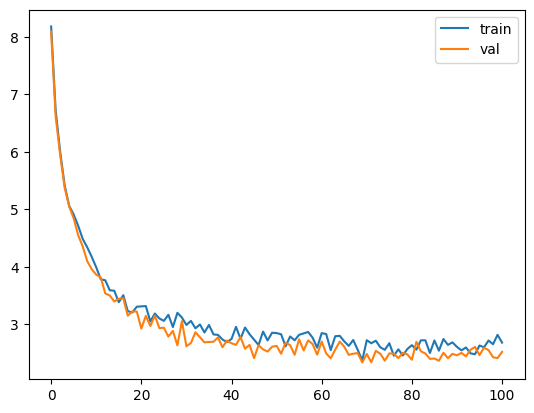

In [29]:
import matplotlib.pyplot as plt
plt.plot([l.cpu() for l in train_loss], label='train')
plt.plot(val_loss, label='val')
plt.legend()

In [32]:
# Generation example
model.eval()
@torch.no_grad
def generate(max_tokens=500):
    sample = torch.tensor([tokenizer.encode(' El')], device=device)
    while sample.shape[-1] < max_tokens:
        logits, loss = model(sample[:,:block_size])
        logits = logits[:,-1,:]
        # print(logits.shape)
        probs = F.softmax(logits, dim=-1)
        topk_probs, topk_indices = torch.topk(probs, 20, dim=-1)
        ix = torch.multinomial(topk_probs, 1)
        next_tok = torch.gather(topk_indices, -1, ix)
        sample = torch.cat((sample, next_tok), dim=-1)
    return tokenizer.decode(sample[0].cpu().numpy())

print(generate())

 El 10 de julio de 1994, que se enfrentan al ama de su programación, a principios de los 80 años de edad. A los 198 años de edad, fue la primera defensa del año en una ciudad en la Federación Central de los Andes.

Trayectoria 
Fue fundada en 2008 como un equipo de China, donde se enfrentó a la temporada 2008 y con una serie de etapas en un jugador de plantel (1989-1999), que se enfrentó en el que ganó la temporada en la UAC-23 en la edad de 10 años.

Palmarés

Referencias

Futbolistas de la selección de fútbol de los Andes. Desde el año 2008
Futbolistas del Registerio C de de de C del de P de de A de de C F de en de de de de M de de de del de de C de de de de C de de P de de de de de de B del C de P de de de del de de de de de S de de C de de S de N de de de de C de de de de de S de C de de de de C de E de de de C de C de de de del de de de F C J C de de de de de de de de C C de F de E de C de de de de de C C C de J de de de de de de de de de de de de de C de de de de del del del de d